# **Problem 4** [BV 9.30]

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x, A):
    """ Analytic center of a set of linear inequalities, A: m x n
    """
    return -np.sum(np.log(1 - A @ x)) - np.sum(np.log(1 - x ** 2))

def grad_f(x, A):
    return  np.sum(np.matmul(A.T, 1 / (1 - np.matmul(A, x))), axis=1, keepdims=True) + 2 * x * (1 / (1 - x**2))

def hessian_f(x, A):
    return np.matmul((A / (1 - np.matmul(A, x))).T, A / (1 - A @ x)) + np.diag(np.squeeze(2 / (1 - x ** 2)))

def nt_decrement_f(x, A, hessian_inv=None):
    if hessian_inv is not None:
        return np.sqrt(grad_f(x, A).T @ hessian_inv @ grad_f(x, A))
    return np.sqrt(grad_f(x, A).T @ np.linalg.inv(hessian_f(x, A)) @ grad_f(x, A))

def diagonal_hessian_f(x, A):
    return np.matmul((A / (1 - np.matmul(A, x))).T, A / (1 - A @ x)) * np.eye(x.shape[0]) + np.diag(np.squeeze(2 / (1 - x ** 2)))

def diagonal_nt_decrement_f(x, A):
    return np.sqrt(grad_f(x, A).T @ np.linalg.inv(diagonal_hessian_f(x, A)) @ grad_f(x, A))

def backtracking_f(x, delta_x, A, alpha, beta):
    t = 1
    # First, making sure that x + t * delta_x falls in the domain
    while np.any(np.matmul(A, x + t * delta_x) >= 1) or np.any(np.abs(x + t * delta_x) >= 1):
        t = beta * t
    # Then, do the backtracking for the best step
    while f(x + t * delta_x, A) > f(x, A) + alpha * t * np.matmul(grad_f(x, A).T, delta_x):
        t = beta * t
    return t

## Problem 4: Part (a) - 1

* m = 200
* n = 100
* alpha = 0.1  
* beta = 0.7



In [3]:
m = 200
n = 100

np.random.seed(1580)
A = np.random.normal(0, 1, size=(m, n))
x_gd = np.zeros((n, 1))

max_iter = 500
min_grad_norm = 1E-4

In [4]:
x_gd_hist = []
x_gd_hist.append(x_gd)
f_gd_hist = []
f_gd_hist.append(f(x_gd, A))
step_gd_hist = []

alpha = 0.1
beta = 0.7

i = 0
while i < max_iter and np.linalg.norm(grad_f(x_gd, A)) > min_grad_norm:
    delta_x_gd = -grad_f(x_gd, A)
    step_gd = backtracking_f(x_gd, delta_x_gd, A, alpha, beta)
    x_gd = x_gd + step_gd * delta_x_gd

    f_gd_hist.append(f(x_gd, A))
    x_gd_hist.append(x_gd)
    step_gd_hist.append(step_gd)
    i = i + 1

f final value: -138.78601988202684


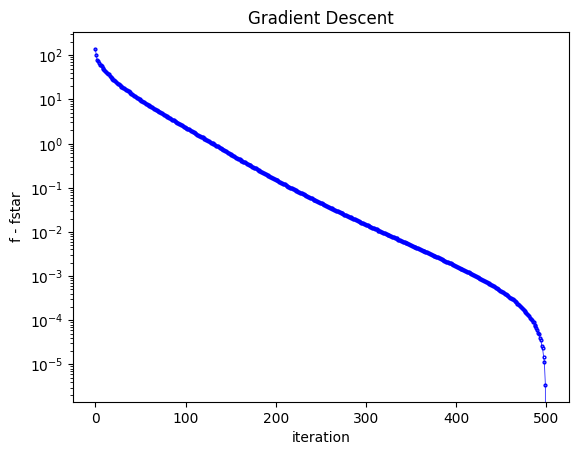

In [5]:
print(f'f final value: {f_gd_hist[-1]}')

plt.figure()
plt.plot(np.array(f_gd_hist) - np.array(f_gd_hist[-1]), '-o', markerfacecolor='none', ms=2, c='b', linewidth=0.5)
plt.xlabel('iteration')
plt.ylabel('f - fstar')
plt.yscale('log')
plt.title('Gradient Descent')
plt.show()

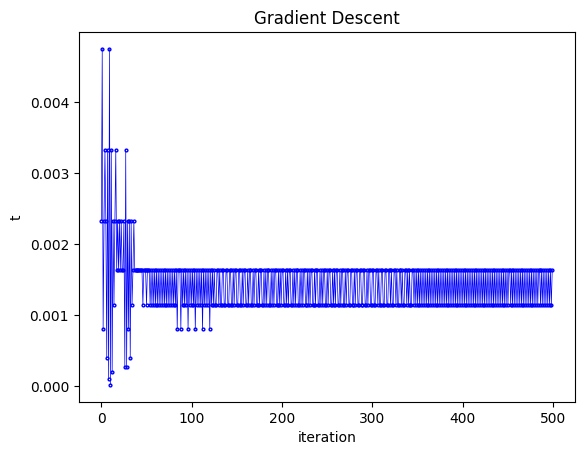

In [6]:
plt.figure()
plt.plot(step_gd_hist, '-o', markerfacecolor='none', ms=2, c='b', linewidth=0.5)
plt.xlabel('iteration')
plt.title('Gradient Descent')
plt.ylabel('t')
plt.show()

## Problem 4: Part (a) - 2

* m = 200
* n = 100
* alpha = 0.3  
* beta = 0.3



In [7]:
m = 200
n = 100

np.random.seed(1580)
A = np.random.normal(0, 1, size=(m, n))
x_gd = np.zeros((n, 1))

max_iter = 500
min_grad_norm = 1E-4

In [8]:
x_gd_hist = []
x_gd_hist.append(x_gd)
f_gd_hist = []
f_gd_hist.append(f(x_gd, A))
step_gd_hist = []

alpha = 0.3
beta = 0.3

i = 0
while i < max_iter and np.linalg.norm(grad_f(x_gd, A)) > min_grad_norm:
    delta_x_gd = -grad_f(x_gd, A)
    step_gd = backtracking_f(x_gd, delta_x_gd, A, alpha, beta)
    x_gd = x_gd + step_gd * delta_x_gd

    f_gd_hist.append(f(x_gd, A))
    x_gd_hist.append(x_gd)
    step_gd_hist.append(step_gd)
    i = i + 1

f final value: -138.78632013424328


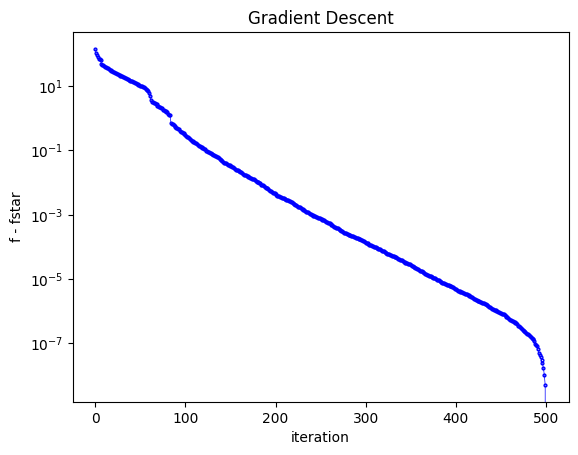

In [9]:
print(f'f final value: {f_gd_hist[-1]}')

plt.figure()
plt.plot(np.array(f_gd_hist) - np.array(f_gd_hist[-1]), '-o', markerfacecolor='none', ms=2, c='b', linewidth=0.5)
plt.xlabel('iteration')
plt.ylabel('f - fstar')
plt.yscale('log')
plt.title('Gradient Descent')
plt.show()

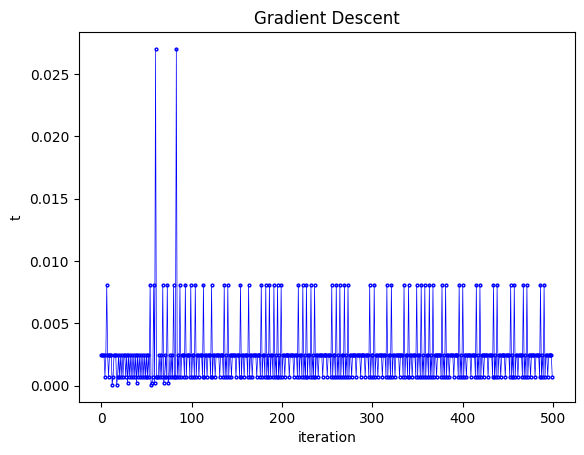

In [10]:
plt.figure()
plt.plot(step_gd_hist, '-o', markerfacecolor='none', ms=2, c='b', linewidth=0.5)
plt.xlabel('iteration')
plt.title('Gradient Descent')
plt.ylabel('t')
plt.show()

## Problem 4: Part (a) - 3

* m = 50
* n = 100
* alpha = 0.3  
* beta = 0.3



In [11]:
m = 50
n = 100

np.random.seed(1580)
A = np.random.normal(0, 1, size=(m, n))
x_gd = np.zeros((n, 1))

max_iter = 500
min_grad_norm = 1E-4

In [12]:
x_gd_hist = []
x_gd_hist.append(x_gd)
f_gd_hist = []
f_gd_hist.append(f(x_gd, A))
step_gd_hist = []

alpha = 0.1
beta = 0.7

i = 0
while i < max_iter and np.linalg.norm(grad_f(x_gd, A)) > min_grad_norm:
    delta_x_gd = -grad_f(x_gd, A)
    step_gd = backtracking_f(x_gd, delta_x_gd, A, alpha, beta)
    x_gd = x_gd + step_gd * delta_x_gd

    f_gd_hist.append(f(x_gd, A))
    x_gd_hist.append(x_gd)
    step_gd_hist.append(step_gd)
    i = i + 1

f final value: -69.34624069832967


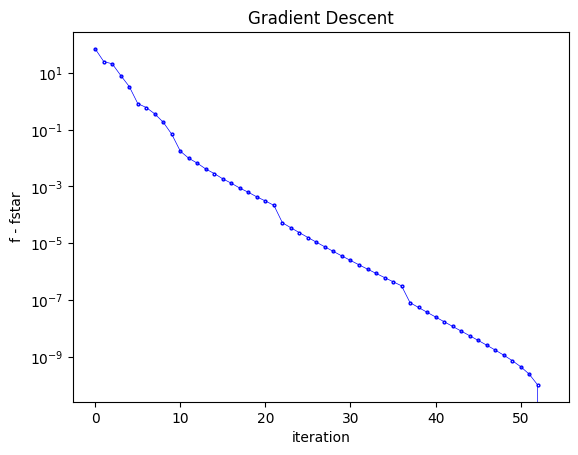

In [13]:
print(f'f final value: {f_gd_hist[-1]}')

plt.figure()
plt.plot(np.array(f_gd_hist) - np.array(f_gd_hist[-1]), '-o', markerfacecolor='none', ms=2, c='b', linewidth=0.5)
plt.xlabel('iteration')
plt.ylabel('f - fstar')
plt.yscale('log')
plt.title('Gradient Descent')
plt.show()

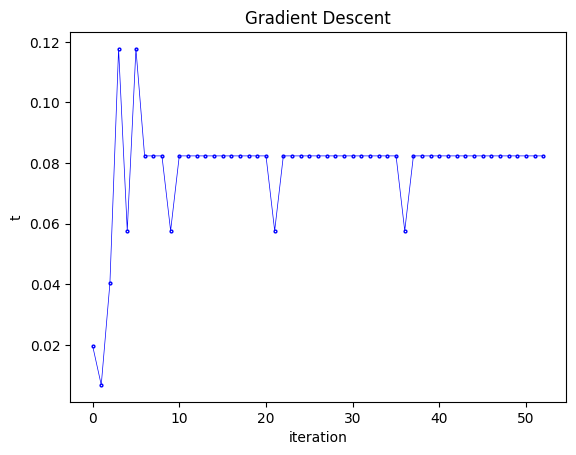

In [14]:
plt.figure()
plt.plot(step_gd_hist, '-o', markerfacecolor='none', ms=2, c='b', linewidth=0.5)
plt.xlabel('iteration')
plt.title('Gradient Descent')
plt.ylabel('t')
plt.show()

## Problem 4: Part (a) - 4

* m = 1000
* n = 100
* alpha = 0.3  
* beta = 0.3



In [15]:
m = 1000
n = 100

np.random.seed(1580)
A = np.random.normal(0, 1, size=(m, n))
x_gd = np.zeros((n, 1))

max_iter = 500
min_grad_norm = 1E-4

In [16]:
x_gd_hist = []
x_gd_hist.append(x_gd)
f_gd_hist = []
f_gd_hist.append(f(x_gd, A))
step_gd_hist = []

alpha = 0.3
beta = 0.3

i = 0
while i < max_iter and np.linalg.norm(grad_f(x_gd, A)) > min_grad_norm:
    delta_x_gd = -grad_f(x_gd, A)
    step_gd = backtracking_f(x_gd, delta_x_gd, A, alpha, beta)
    x_gd = x_gd + step_gd * delta_x_gd

    f_gd_hist.append(f(x_gd, A))
    x_gd_hist.append(x_gd)
    step_gd_hist.append(step_gd)
    i = i + 1

f final value: -58.56551911928645


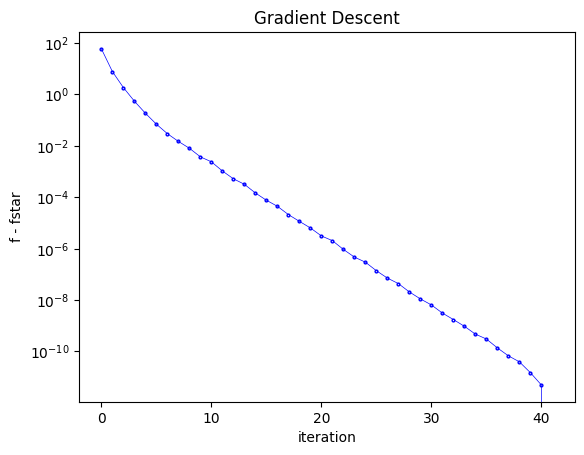

In [17]:
print(f'f final value: {f_gd_hist[-1]}')

plt.figure()
plt.plot(np.array(f_gd_hist) - np.array(f_gd_hist[-1]), '-o', markerfacecolor='none', ms=2, c='b', linewidth=0.5)
plt.xlabel('iteration')
plt.ylabel('f - fstar')
plt.yscale('log')
plt.title('Gradient Descent')
plt.show()

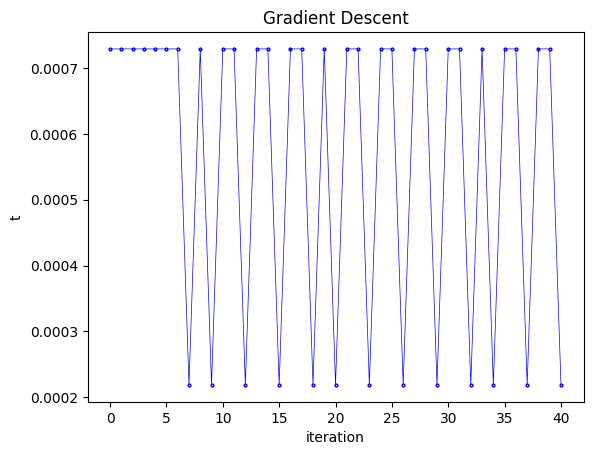

In [18]:
plt.figure()
plt.plot(step_gd_hist, '-o', markerfacecolor='none', ms=2, c='b', linewidth=0.5)
plt.xlabel('iteration')
plt.title('Gradient Descent')
plt.ylabel('t')
plt.show()

## Problem 4: Part (b) - 1

* m = 1000
* n = 100
* alpha = 0.3  
* beta = 0.3

In [19]:
m = 1000
n = 100

np.random.seed(1580)
A = np.random.normal(0, 1, size=(m, n))
x_nt = np.zeros((n, 1))

max_iter = 500
epsilon = 1E-9

In [20]:
x_nt_hist = []
x_nt_hist.append(x_nt)
f_nt_hist = []
f_nt_hist.append(f(x_nt, A))
step_nt_hist = []

alpha = 0.3
beta = 0.3
i = 0
while i < max_iter and (nt_decrement_f(x_nt, A) ** 2) / 2 > epsilon:
    delta_x_nt = -np.linalg.inv(hessian_f(x_nt, A)) @ grad_f(x_nt, A)
    step_nt = backtracking_f(x_nt, delta_x_nt, A, alpha, beta)
    x_nt = x_nt + step_nt * delta_x_nt

    f_nt_hist.append(f(x_nt, A))
    x_nt_hist.append(x_nt)
    step_nt_hist.append(step_nt)
    i = i + 1

f final value: -58.565519119293164


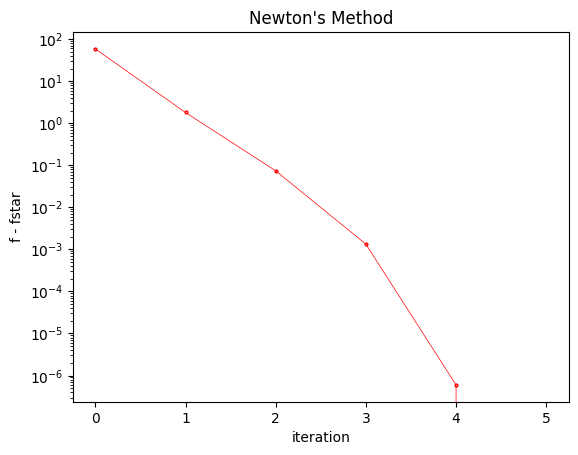

In [21]:
print(f'f final value: {f_nt_hist[-1]}')

plt.figure()
plt.plot(np.array(f_nt_hist) - np.array(f_nt_hist[-1]), '-o', markerfacecolor='none', ms=2, c='r', linewidth=0.5)
plt.xlabel('iteration')
plt.ylabel('f - fstar')
plt.title("Newton's Method")
plt.yscale('log')
plt.show()

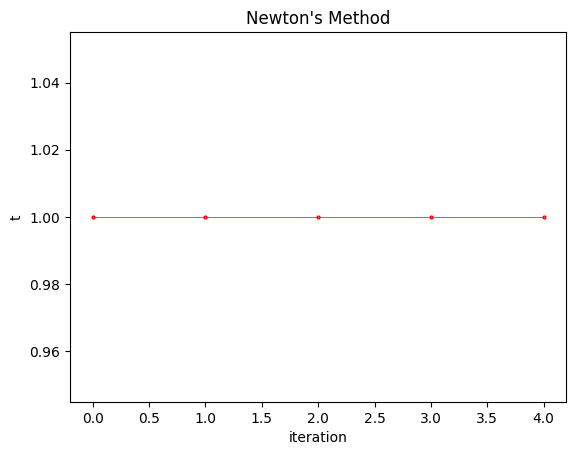

In [22]:
plt.figure()
plt.plot(step_nt_hist, '-o', markerfacecolor='none', ms=2, c='r', linewidth=0.5)
plt.xlabel('iteration')
plt.title("Newton's Method")
plt.ylabel('t')
plt.show()

## Problem 4: Part (b) - 2

* m = 1000
* n = 100
* alpha = 0.1  
* beta = 0.9

In [23]:
m = 1000
n = 100

np.random.seed(1580)
A = np.random.normal(0, 1, size=(m, n))
x_nt = np.zeros((n, 1))

max_iter = 500
epsilon = 1E-9

In [24]:
x_nt_hist = []
x_nt_hist.append(x_nt)
f_nt_hist = []
f_nt_hist.append(f(x_nt, A))
step_nt_hist = []

alpha = 0.1
beta = 0.9

i = 0
while i < max_iter and (nt_decrement_f(x_nt, A) ** 2) / 2 > epsilon:
    delta_x_nt = -np.linalg.inv(hessian_f(x_nt, A)) @ grad_f(x_nt, A)
    step_nt = backtracking_f(x_nt, delta_x_nt, A, alpha, beta)
    x_nt = x_nt + step_nt * delta_x_nt

    f_nt_hist.append(f(x_nt, A))
    x_nt_hist.append(x_nt)
    step_nt_hist.append(step_nt)
    i = i + 1

f final value: -58.565519119293164


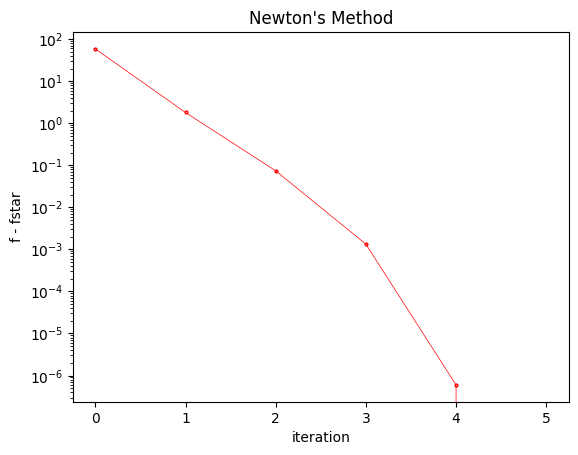

In [25]:
print(f'f final value: {f_nt_hist[-1]}')

plt.figure()
plt.plot(np.array(f_nt_hist) - np.array(f_nt_hist[-1]), '-o', markerfacecolor='none', ms=2, c='r', linewidth=0.5)
plt.xlabel('iteration')
plt.ylabel('f - fstar')
plt.title("Newton's Method")
plt.yscale('log')
plt.show()

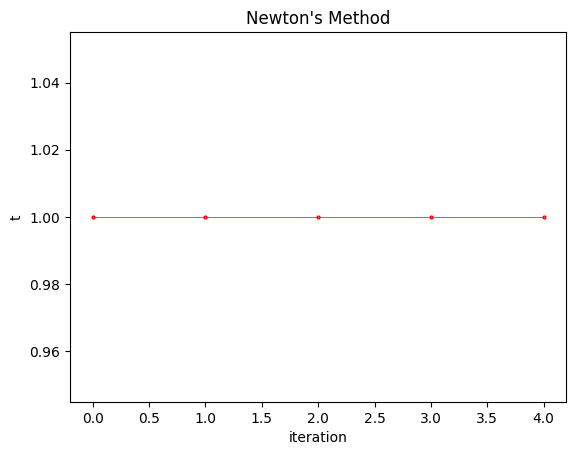

In [26]:
plt.figure()
plt.plot(step_nt_hist, '-o', markerfacecolor='none', ms=2, c='r', linewidth=0.5)
plt.xlabel('iteration')
plt.title("Newton's Method")
plt.ylabel('t')
plt.show()

# **Problem 5** [BV 9.31]


## Problem 5: Part (a): Reusing Hessian - 1

* m = 1000
* n = 100
* alpha = 0.3  
* beta = 0.3
* N = 5

In [27]:
m = 1000
n = 100

np.random.seed(1580)
A = np.random.normal(0, 1, size=(m, n))
x_nt = np.zeros((n, 1))

max_iter = 500
epsilon = 1E-9
N = 5

In [28]:
x_nt_hist = []
x_nt_hist.append(x_nt)
f_nt_hist = []
f_nt_hist.append(f(x_nt, A))
step_nt_hist = []

alpha = 0.3
beta = 0.3

i = 0
hessian_inv = np.linalg.inv(hessian_f(x_nt, A))
while i < max_iter and (nt_decrement_f(x_nt, A, hessian_inv) ** 2) / 2 > epsilon:
    if i % N == 0:
        hessian_inv = np.linalg.inv(hessian_f(x_nt, A))
    delta_x_nt = -hessian_inv @ grad_f(x_nt, A)
    step_nt = backtracking_f(x_nt, delta_x_nt, A, alpha, beta)
    x_nt = x_nt + step_nt * delta_x_nt

    f_nt_hist.append(f(x_nt, A))
    x_nt_hist.append(x_nt)
    step_nt_hist.append(step_nt)
    i = i + 1

f final value: -58.56551911919852


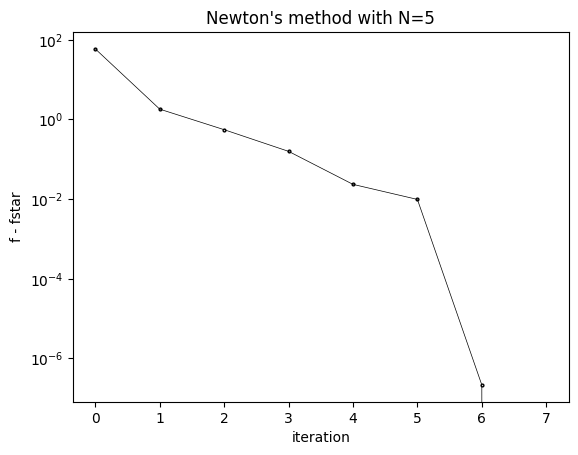

In [29]:
print(f'f final value: {f_nt_hist[-1]}')

plt.figure()
plt.plot(np.array(f_nt_hist) - np.array(f_nt_hist[-1]), '-o', markerfacecolor='none', ms=2, c='k', linewidth=0.5)
plt.xlabel('iteration')
plt.ylabel('f - fstar')
plt.title(f"Newton's method with N={N}")
plt.yscale('log')
plt.show()

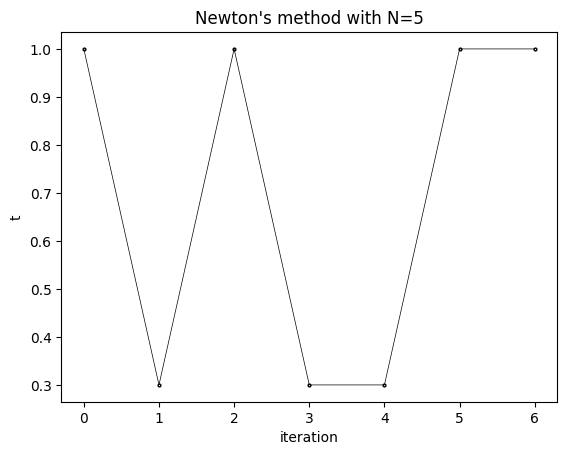

In [30]:
plt.figure()
plt.plot(step_nt_hist, '-o', markerfacecolor='none', ms=2, c='k', linewidth=0.5)
plt.xlabel('iteration')
plt.ylabel('t')
plt.title("Newton's method with N=5")
plt.show()

## Problem 5: Part (a): Reusing Hessian - 2

* m = 1000
* n = 100
* alpha = 0.3  
* beta = 0.3
* N = 15

In [31]:
m = 1000
n = 100

np.random.seed(1580)
A = np.random.normal(0, 1, size=(m, n))
x_nt = np.zeros((n, 1))

max_iter = 500
epsilon = 1E-9
N = 15

In [32]:
x_nt_hist = []
x_nt_hist.append(x_nt)
f_nt_hist = []
f_nt_hist.append(f(x_nt, A))
step_nt_hist = []

alpha = 0.3
beta = 0.3

i = 0
hessian_inv = np.linalg.inv(hessian_f(x_nt, A))
while i < max_iter and (nt_decrement_f(x_nt, A, hessian_inv) ** 2) / 2 > epsilon:
    if i % N == 0:
        hessian_inv = np.linalg.inv(hessian_f(x_nt, A))
    delta_x_nt = -hessian_inv @ grad_f(x_nt, A)
    step_nt = backtracking_f(x_nt, delta_x_nt, A, alpha, beta)
    x_nt = x_nt + step_nt * delta_x_nt

    f_nt_hist.append(f(x_nt, A))
    x_nt_hist.append(x_nt)
    step_nt_hist.append(step_nt)
    i = i + 1

f final value: -58.56551911929333


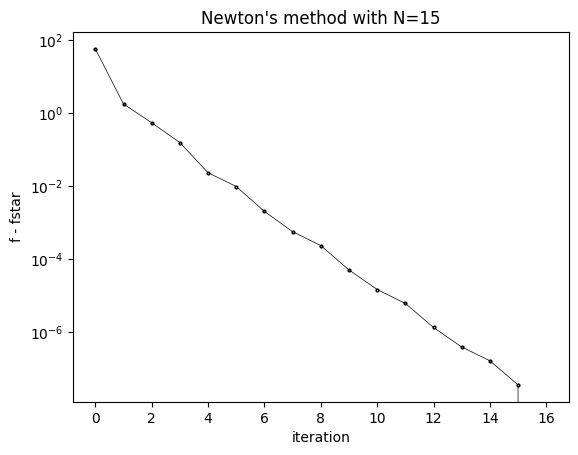

In [33]:
print(f'f final value: {f_nt_hist[-1]}')

plt.figure()
plt.plot(np.array(f_nt_hist) - np.array(f_nt_hist[-1]), '-o', markerfacecolor='none', ms=2, c='k', linewidth=0.5)
plt.xlabel('iteration')
plt.ylabel('f - fstar')
plt.title(f"Newton's method with N={N}")
plt.yscale('log')
plt.show()

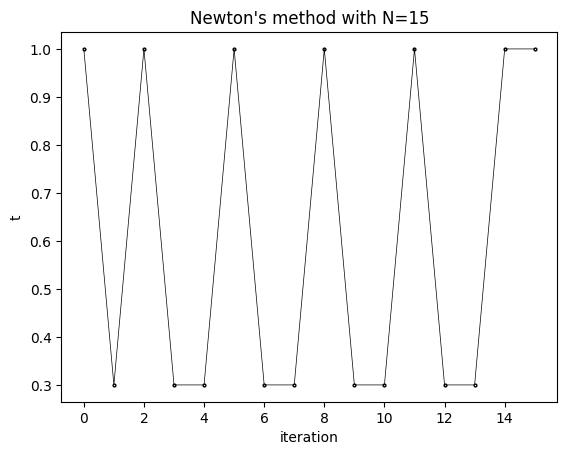

In [34]:
plt.figure()
plt.plot(step_nt_hist, '-o', markerfacecolor='none', ms=2, c='k', linewidth=0.5)
plt.xlabel('iteration')
plt.ylabel('t')
plt.title(f"Newton's method with N={N}")
plt.show()

## Problem 5: Part (b): Diagonal Hessian - 2

* m = 1000
* n = 100
* alpha = 0.3  
* beta = 0.3

In [35]:
m = 1000
n = 100

np.random.seed(1580)
A = np.random.normal(0, 1, size=(m, n))
x_nt = np.zeros((n, 1))

max_iter = 500
epsilon = 1E-9

In [36]:
x_nt_hist = []
x_nt_hist.append(x_nt)
f_nt_hist = []
f_nt_hist.append(f(x_nt, A))
step_nt_hist = []

alpha = 0.3
beta = 0.3

i = 0
while i < max_iter and (diagonal_nt_decrement_f(x_nt, A) ** 2) / 2 > epsilon:
    delta_x_nt = -np.linalg.inv(diagonal_hessian_f(x_nt, A)) @ grad_f(x_nt, A)
    step_nt = backtracking_f(x_nt, delta_x_nt, A, alpha, beta)
    x_nt = x_nt + step_nt * delta_x_nt

    f_nt_hist.append(f(x_nt, A))
    x_nt_hist.append(x_nt)
    step_nt_hist.append(step_nt)
    i = i + 1

f final value: -58.5655191176283


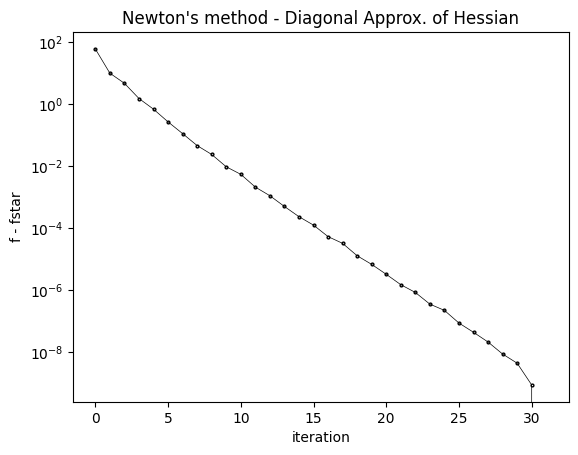

In [37]:
print(f'f final value: {f_nt_hist[-1]}')

plt.figure()
plt.plot(np.array(f_nt_hist) - np.array(f_nt_hist[-1]), '-o', markerfacecolor='none', ms=2, c='k', linewidth=0.5)
plt.xlabel('iteration')
plt.ylabel('f - fstar')
plt.title("Newton's method - Diagonal Approx. of Hessian")
plt.yscale('log')
plt.show()

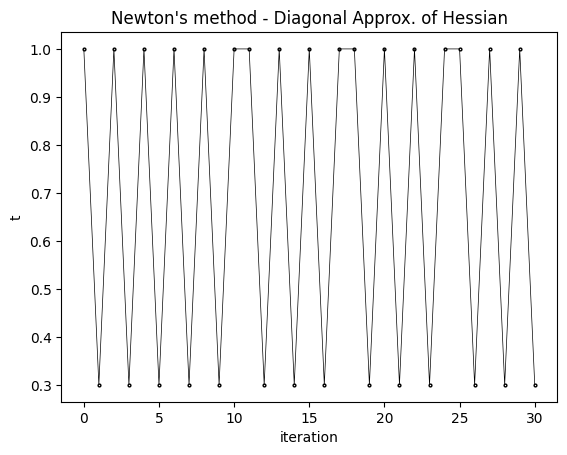

In [38]:
plt.figure()
plt.plot(step_nt_hist, '-o', markerfacecolor='none', ms=2, c='k', linewidth=0.5)
plt.xlabel('iteration')
plt.title("Newton's method - Diagonal Approx. of Hessian")
plt.ylabel('t')
plt.show()

# Aside: Problem 2 [Calculations]

In [39]:
f = lambda x: np.logaddexp(x, -x) # to avoid overflow of exponential in extreme cases
fp = lambda x: (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
fdp = lambda x: 4 / (np.exp(x) + np.exp(-x))**2

g = lambda x: -np.log(x) + x
gp = lambda x: -1/x + 1
gdp = lambda x: 1/(x**2)

In [40]:
x = 1
print(0, x, g(x))
for i in range(5):
    deltax = -(1/fdp(x))*fp(x)
    x = x + deltax
    print(i+1, x, f(x))

0 1 1.0
1 -0.8134302039235093 0.9928690093583382
2 0.4094023165833858 0.7747107967452456
3 -0.04730491645561574 0.6942656410735624
4 7.060280364456356e-05 0.6931471830523233
5 -2.34706609074202e-13 0.6931471805599453


In [41]:
x = 1.1
print(0, x, g(x))
for i in range(5):
    deltax = -(1/fdp(x))*fp(x)
    x = x + deltax
    print(i+1, x, f(x))

0 1.1 1.004689820195675
1 -1.128552585267947 1.2280838431064225
2 1.2341311330391007 1.3154640598055265
3 -1.6951659799228027 1.728308149209156
4 5.715360100379735 5.71537095710718
5 -23021.356485727516 23021.356485727516


In [42]:
x = 3
print(0, x, g(x))
for i in range(5):
    deltax = -(1/gdp(x))*gp(x)
    x = x + deltax
    print(i+1, x, g(x))

0 3 1.9013877113318902
1 -3.000000000000001 nan
2 -15.000000000000007 nan
3 -255.00000000000023 nan
4 -65535.000000000124 nan
5 -4294967295.000016 nan


/var/folders/v7/3flz87xn7sqbksjnlnrzt7fc0000gn/T/ipykernel_93709/3801979472.py:5: RuntimeWarning: invalid value encountered in log
  g = lambda x: -np.log(x) + x
